### В данной домашней работе Вам предстоит отработать следующие 2 навыка: работа с пропущенными значениями и анализ выбросов.

In [100]:
import numpy as np
import pandas as pd

data = pd.read_csv('processed_data_with_new_features.csv', index_col='id')

In [101]:
data.head(10)

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,NaN,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,NaN,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id0801584,1,1061.355223,0,1.100107,6.095825,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
id1813257,0,1053.529749,0,1.327852,5.834811,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
id1324603,1,930.399753,0,5.722427,7.347300,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
id1301050,0,930.399753,0,1.311541,5.545177,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


Никудышный гном случайно пролил кофе на папку с данными и кодом. К несчастью, из-за этого они с братьями потеряли кучу информации в столбиках **passenger_count** и **distance_km**.

In [102]:
### Выведите количество пропусков в данных колонках
### На всякий случай, проверьте целостность данных в остальных

### Your code is here

In [103]:
data.isna().sum()

vendor_id                  0
passenger_count       145864
store_and_fwd_flag         0
distance_km           145864
log_trip_duration          0
anomaly                    0
traffic_jam                0
day_of_week_1              0
day_of_week_2              0
day_of_week_3              0
day_of_week_4              0
day_of_week_5              0
day_of_week_6              0
hour_1                     0
hour_2                     0
hour_3                     0
hour_4                     0
hour_5                     0
hour_6                     0
hour_7                     0
hour_8                     0
hour_9                     0
hour_10                    0
hour_11                    0
hour_12                    0
hour_13                    0
hour_14                    0
hour_15                    0
hour_16                    0
hour_17                    0
hour_18                    0
hour_19                    0
hour_20                    0
hour_21                    0
hour_22       

Начнем с **passenger_count**. Вообще говоря, изначально это была категориальная колонка, к которой мы применили технику OneHotEncoder. Чтобы избавиться от пропусков в данных, конечно, можно просто убрать все объекты, в которых есть пропуски, но тогда мы потеряем ценную информацию. 

Воспользуйтесь относительно простым приемом из лекции: в указанной колонке заполните пропуски самым *популярным* значением среди неотсутствующих.

In [104]:
popular_category = data['passenger_count'].value_counts().index[0]
data['passenger_count'] = data['passenger_count'].fillna(popular_category)

In [105]:
data.isna().sum()

vendor_id                  0
passenger_count            0
store_and_fwd_flag         0
distance_km           145864
log_trip_duration          0
anomaly                    0
traffic_jam                0
day_of_week_1              0
day_of_week_2              0
day_of_week_3              0
day_of_week_4              0
day_of_week_5              0
day_of_week_6              0
hour_1                     0
hour_2                     0
hour_3                     0
hour_4                     0
hour_5                     0
hour_6                     0
hour_7                     0
hour_8                     0
hour_9                     0
hour_10                    0
hour_11                    0
hour_12                    0
hour_13                    0
hour_14                    0
hour_15                    0
hour_16                    0
hour_17                    0
hour_18                    0
hour_19                    0
hour_20                    0
hour_21                    0
hour_22       

In [106]:
grouped['passenger_count'].values[-1]

930.3997532751514

С колонкой **distance_km** поступим более интересным способом!

Чтобы заполнить пропуск в данной колонке для того или иного объекта, можно находить наиболее похожий на него объект и подглядывать в его значение **distance_km**. Для того, чтобы понять, насколько объекты похожи друг на друга, необходимо использовать Евклидово расстояние между этими самыми объектами в пространстве всех признаков!

С учетом количества объектов в нашем датасете и признаков, посчитать попарные расстояния будет мега-сложно. Поэтому давайте называть объекты похожими, если они принадлежат одной категории, составленной из следующих колонок:

1. vendor_id
2. store_and_fwd_flag
3. traffic_jam
4. month_2
5. month_3
6. month_4
7. month_5
8. month_6

Внутри каждой группы найдите среднее значение признака **distance_km** и заполните NaN'ы в объектах с пропуском в соответствии с тем, к какой категории относится данный объект. Похожее упражнение мы делали на практике в занятии!

**Hint**: достаточно просто взять group by по указанным выше категориальным колонкам и верно вставить полученный результат в исходную табличку.

P.S. Колонки выбраны случайным образом. Можно было взять и другую комбинацию.

In [107]:
cols_to_group = ['vendor_id', 'store_and_fwd_flag', 'traffic_jam', 'month_2',
                 'month_3', 'month_4', 'month_5', 'month_6']

### Сгруппируем датасет по этим колонкам и посчитаем
### среднее значение таргета

mapping = data[~data.distance_km.isna()].groupby(cols_to_group)['distance_km'].mean()
mapping = mapping.reset_index()


In [108]:
mapping

,vendor_id,store_and_fwd_flag,traffic_jam,month_2,month_3,month_4,month_5,month_6,distance_km
0,0,0,0,0,0,0,0,0,3.323767
1,0,0,0,0,0,0,0,1,3.463570
2,0,0,0,0,0,0,1,0,3.507959
3,0,0,0,0,0,1,0,0,3.389926
4,0,0,0,0,1,0,0,0,3.405043
5,0,0,0,1,0,0,0,0,3.322016
6,0,0,1,0,0,0,0,0,3.139797
7,0,0,1,0,0,0,0,1,3.244716
8,0,0,1,0,0,0,1,0,3.258492
9,0,0,1,0,0,1,0,0,3.253105


In [109]:
mapping.columns[:-1]#без таргета

Index(['vendor_id', 'store_and_fwd_flag', 'traffic_jam', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6'],
      dtype='object')

In [110]:
#теперь у нас два таргета от двух датафреймов
merged = pd.merge(data,
                  mapping,
                  left_on=list(mapping.columns[:-1]),
                  right_on=list(mapping.columns[:-1]),
                  how='left')

In [111]:
merged['distance_km_x'] = merged['distance_km_x'].fillna(merged.distance_km_y)

In [112]:
ans = merged.rename(columns = {'distance_km_x':'distance_km'}).drop('distance_km_y', axis = 1)

In [94]:
#ans.to_csv('ans_6.csv', sep = ';')
#df = pd.read_csv('ans_6.csv', sep = ';')
#df2 = pd.read_csv('cor_ans_6.csv', sep = ';')

### Теперь наши данные чисты! Замерьте качество модели на Кросс-Валидации

In [113]:
X = ans.drop('log_trip_duration', axis = 1)
Y = ans['log_trip_duration']

In [114]:
from sklearn.model_selection import KFold

selector = KFold(n_splits=4, shuffle=True, random_state=33)

from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

### Your code is here

model = LinearRegression()
cv_result = cross_validate(model, X, Y, scoring = 'neg_mean_squared_error', cv=selector, return_train_score = True)
#cross_val_error = np.mean()

#print(f"MSLE на Кросс-валидации: {round(cross_val_error, 3)}")

In [76]:
round(-cv_result['train_score'].mean(), 3)

0.43

### Проведем анализ выбросов! Нарисуйте ящик с усами и гистограмму для таргетной переменной.

<AxesSubplot:>

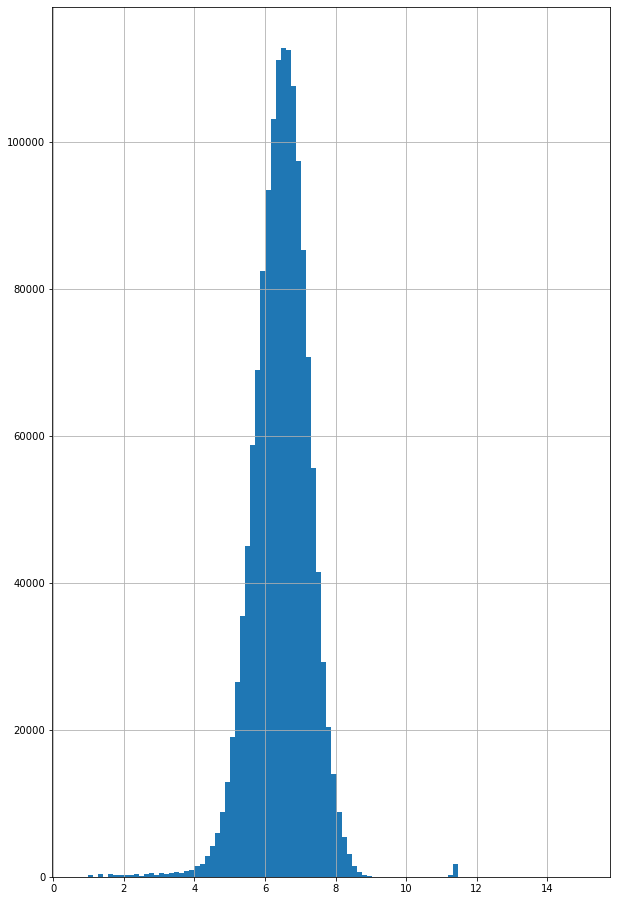

In [115]:
import matplotlib.pyplot as plt

### Your code is here

fig = plt.figure()
fig.set_size_inches((10, 16))

ans['log_trip_duration'].hist(bins=100)

{'whiskers': [<matplotlib.lines.Line2D at 0x22235eaba90>,
 'caps': [<matplotlib.lines.Line2D at 0x22235b3b070>,
 'boxes': [<matplotlib.lines.Line2D at 0x22235eab7c0>],
 'medians': [<matplotlib.lines.Line2D at 0x22235b3b610>],
 'fliers': [<matplotlib.lines.Line2D at 0x22235b3b8e0>],
 'means': []}

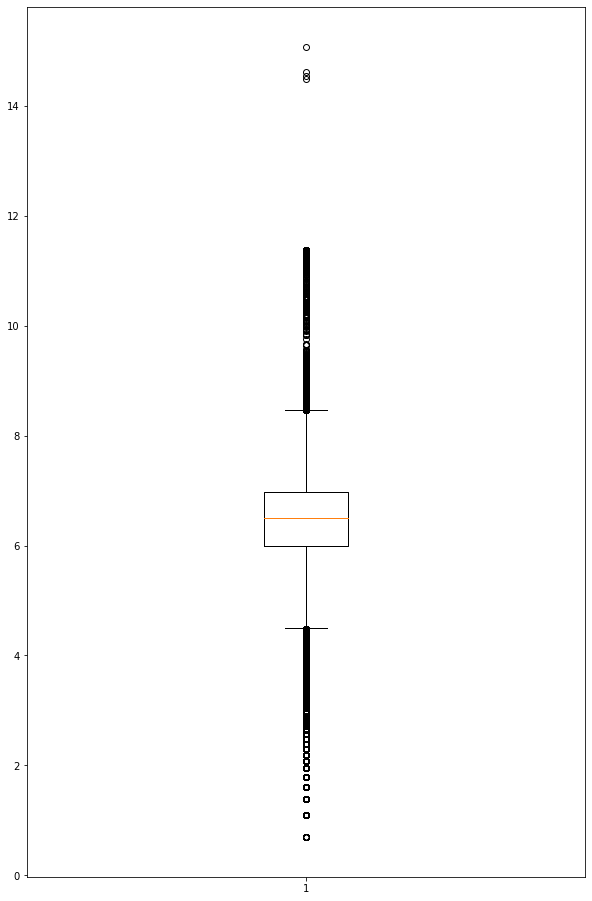

In [116]:
fig = plt.figure()

fig.set_size_inches((10, 16))

plt.boxplot(ans['log_trip_duration'].values)#data['log_trip_duration'].values - переводит в array

Есть ли, на ваш взгляд, в данных выбросы?

Кажется, что да!

Давайте почистим их, удалив те объекты, таргеты которых находятся вне промежутка

[топ 99,5% значение;   топ 0,5% значение]

In [117]:
### Your code is here
q_low = ans['log_trip_duration'].quantile(0.005)
q_high = ans['log_trip_duration'].quantile(0.995)
q_low, q_high

(3.9318256327243257, 8.32845106681936)

In [93]:
ans['log_trip_duration'].unique()

array([ 6.12249281,  6.49828215,  7.66152708, ...,  9.35131897,
       11.1914108 ,  8.72013404])

In [118]:
ans = ans[(ans['log_trip_duration'] >= q_low) & (ans['log_trip_duration'] <= q_high)]

Снова замерьте качество на кросс-валидации, используя старый selector

In [121]:
X_new = ans.drop('log_trip_duration', axis = 1)
Y_new = ans['log_trip_duration']

In [122]:
from sklearn.model_selection import KFold

selector = KFold(n_splits=4, shuffle=True, random_state=33)

from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

### Your code is here

model = LinearRegression()
cv_result = cross_validate(model, X_new, Y_new, scoring = 'neg_mean_squared_error', cv=selector, return_train_score = True)

In [124]:
round(-cv_result['test_score'].mean(), 3)

0.342